In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('feature_importance/merged_feature_importance.csv', index_col=0)
df = df.dropna(axis=1, how='any')
df

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4DummyMeanRegression,243,5,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,M4XGBRegressor,sNaive,1,shap,0.000468,0.005455,0.022739,0.006392,0.008655,0.003732,...,0.001165,0.002094,0.000797,0.001908,0.000830,0.002704,0.001121,0.000481,0.002145,0.003635
2,M4DummyMeanRegression,132,3,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M4KerasNetRegressionModel,260,2,shap,0.000815,0.001714,0.035342,0.006317,0.045938,0.007184,...,0.002994,0.002467,0.002194,0.003384,0.001338,0.001678,0.002353,0.000510,0.006355,0.007315
4,M4XGBRegressor,239,9,shap,0.000325,0.004640,0.018604,0.005401,0.006612,0.002574,...,0.001362,0.002277,0.000835,0.000638,0.000963,0.000758,0.000735,0.000343,0.001692,0.005311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,M4RandomForestRegressor,036,6,shap,0.000273,0.001670,0.012024,0.002931,0.004162,0.000864,...,0.001737,0.002305,0.000581,0.000659,0.000580,0.000946,0.000416,0.000264,0.001239,0.002626
13438,M4DummyMeanRegression,005,8,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13439,M4RandomForestRegressor,sNaive,3,shap,0.000301,0.002060,0.014822,0.004195,0.004892,0.001004,...,0.001740,0.002312,0.000698,0.000619,0.000663,0.001930,0.000674,0.000306,0.000878,0.002781
13440,M4DummyMeanRegression,078,6,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
#df['run'].unique()

In [4]:
static_columns = ['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm', 'run']
feature_columns = set(df.columns) - set(static_columns)
feature_columns = sorted(list(feature_columns))

In [5]:
data = df[(df['ml_algorithm']=='M4MLPRegressor') & (df['feature_importance_method']=='permutation')]

In [6]:
#sns.boxplot(x="day", y="total_bill", data=data)

In [7]:
mdf = df.melt(id_vars=['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm', 'run'], var_name="feature", value_name="importance")

In [8]:
mdf['feature_importance_method'].unique()

array(['shap', 'permutation', 'xgboost-weight', 'randomforest',
       'xgboost-total_gain', 'xgboost-gain', 'xgboost-cover',
       'xgboost-total_cover'], dtype=object)

In [9]:
mdf['forecasting_algorithm'].unique()

array(['243', 'sNaive', '132', '260', '239', 'Theta', '039', '191', '070',
       'Com', '211', '244', 'ARIMA', '241', '126', '255', '250', '118',
       '238', '072', 'Holt', 'RNN', '216', '236', 'ETS', '253', '069',
       'MLP', 'Naive', '219', '227', '218', '256', '106', '024', '036',
       '009', 'Damped', '251', '225', '212', '091', '078', '043', '245',
       '258', '248', '249', '231', '030', 'Naive2', '237', '169', '005',
       '104', '252', '223', '234', 'SES', '082', '235'], dtype=object)

In [10]:
mdf['feature_importance_method'].unique()

array(['shap', 'permutation', 'xgboost-weight', 'randomforest',
       'xgboost-total_gain', 'xgboost-gain', 'xgboost-cover',
       'xgboost-total_cover'], dtype=object)

In [11]:
mdf['ml_algorithm'].unique()

array(['M4DummyMeanRegression', 'M4XGBRegressor',
       'M4KerasNetRegressionModel', 'M4RandomForestRegressor',
       'M4RandomForestSingleOutputRegressor'], dtype=object)

In [12]:
figures_directory = 'figures'
show_top_n_features = 20

In [13]:
best_features = mdf.groupby('feature').agg({'importance': lambda c: c.abs().sum()}).reset_index().sort_values(by='importance', ascending=False)['feature'].to_list()[:show_top_n_features]

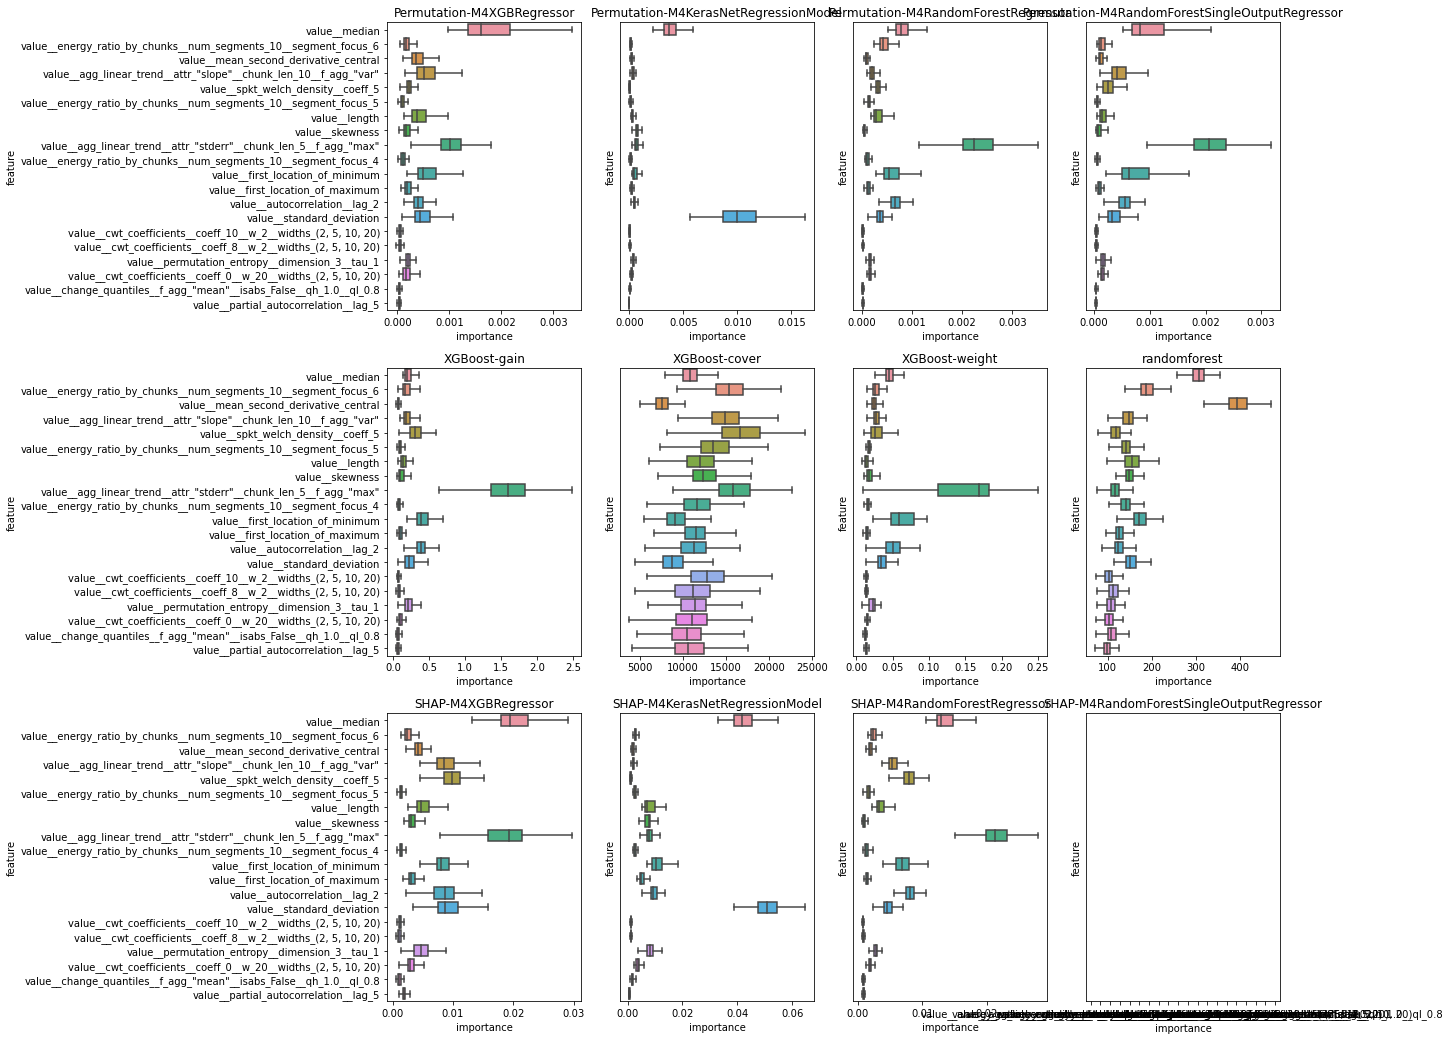

In [14]:
fig, axes = plt.subplots(3, 4, figsize=(16, 18))
df = mdf[mdf['feature'].isin(best_features)]

ax_pos = axes[0][0]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[(df['feature_importance_method']=='permutation') & (df['ml_algorithm']=='M4XGBRegressor')], showfliers = False, order=best_features);
ax_pos.set_title('Permutation-M4XGBRegressor')

ax_pos = axes[0][1]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[(df['feature_importance_method']=='permutation') & (df['ml_algorithm']=='M4KerasNetRegressionModel')], showfliers = False, order=best_features);
ax_pos.set_yticks([])
ax_pos.set_title('Permutation-M4KerasNetRegressionModel')

ax_pos = axes[0][2]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[(df['feature_importance_method']=='permutation') & (df['ml_algorithm']=='M4RandomForestRegressor')], showfliers = False, order=best_features);
ax_pos.set_yticks([])
ax_pos.set_title('Permutation-M4RandomForestRegressor')

ax_pos = axes[0][3]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[(df['feature_importance_method']=='permutation') & (df['ml_algorithm']=='M4RandomForestSingleOutputRegressor')], showfliers = False, order=best_features);
ax_pos.set_yticks([])
ax_pos.set_title('Permutation-M4RandomForestSingleOutputRegressor')

ax_pos = axes[1][0]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[df['feature_importance_method']=='xgboost-gain'], showfliers = False, order=best_features);
#ax_pos.set_yticks([])
ax_pos.set_title('XGBoost-gain')

ax_pos = axes[1][1]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[df['feature_importance_method']=='xgboost-cover'], showfliers = False, order=best_features);
ax_pos.set_yticks([])
ax_pos.set_title('XGBoost-cover')

ax_pos = axes[1][2]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[df['feature_importance_method']=='randomforest'], showfliers = False, order=best_features);
ax_pos.set_yticks([])
ax_pos.set_title('XGBoost-weight')

ax_pos = axes[1][3]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[df['feature_importance_method']=='xgboost-weight'], showfliers = False, order=best_features);
ax_pos.set_yticks([])
ax_pos.set_title('randomforest')

ax_pos = axes[2][0]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[(df['feature_importance_method']=='shap') & (df['ml_algorithm']=='M4XGBRegressor')], showfliers = False, order=best_features);
ax_pos.set_title('SHAP-M4XGBRegressor')

ax_pos = axes[2][1]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[(df['feature_importance_method']=='shap') & (df['ml_algorithm']=='M4KerasNetRegressionModel')], showfliers = False, order=best_features);
ax_pos.set_yticks([])
ax_pos.set_title('SHAP-M4KerasNetRegressionModel')

ax_pos = axes[2][2]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[(df['feature_importance_method']=='shap') & (df['ml_algorithm']=='M4RandomForestRegressor')], showfliers = False, order=best_features);
ax_pos.set_yticks([])
ax_pos.set_title('SHAP-M4RandomForestRegressor')

ax_pos = axes[2][3]
sns.boxplot(ax=ax_pos, y="feature", x="importance", data=df[(df['feature_importance_method']=='shap') & (df['ml_algorithm']=='M4RandomForestSingleOutputRegressor')], showfliers = False, order=best_features);
ax_pos.set_yticks([])
ax_pos.set_title('SHAP-M4RandomForestSingleOutputRegressor')

plt.savefig(f'{figures_directory}/feature_importance_top_{show_top_n_features}.pdf', bbox_inches='tight', pad_inches=0)

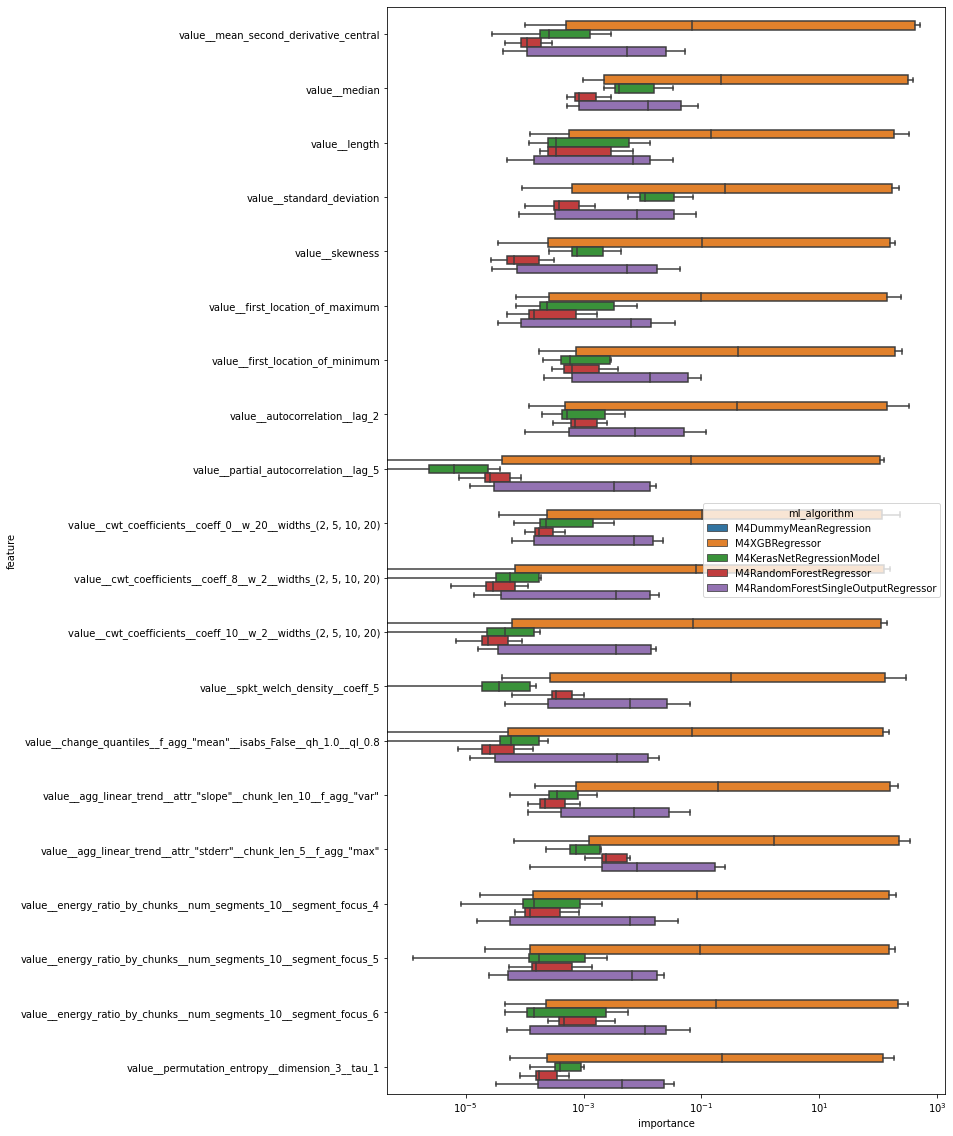

In [15]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 20))
sns.boxplot(y="feature", x="importance", hue="ml_algorithm", showfliers = False, data=mdf[mdf['feature'].isin(best_features)])
plt.xscale('log')
plt.savefig(f'{figures_directory}/feature_importance_ml_top_{show_top_n_features}.pdf', bbox_inches='tight', pad_inches=0)

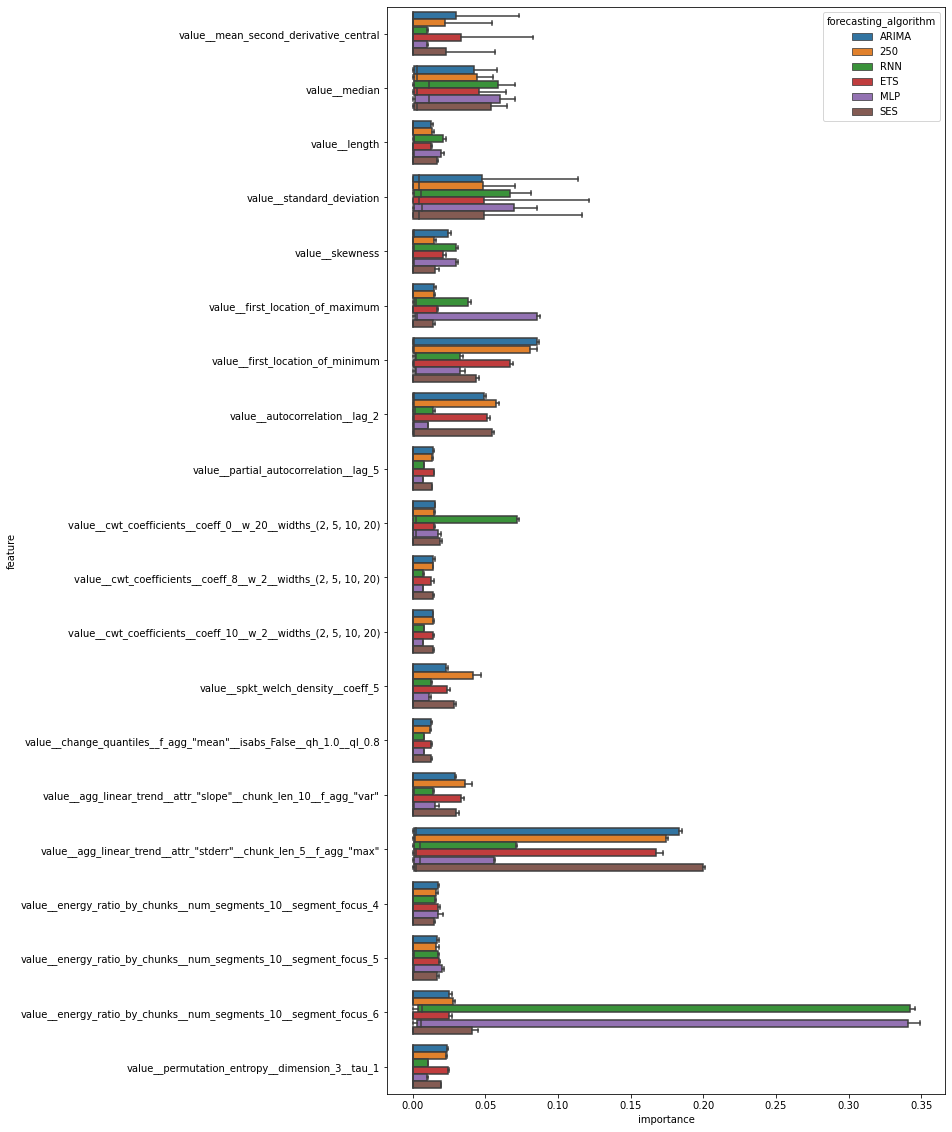

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 20))
sns.boxplot(y="feature", x="importance", hue="forecasting_algorithm", showfliers = False, data=mdf[mdf['feature'].isin(best_features) & (mdf['forecasting_algorithm'].isin(['250', 'MLP', 'ETS', 'ARIMA', 'RNN', 'sNAIVE', 'SES']))])
#plt.xscale('log')
plt.savefig(f'{figures_directory}/feature_importance_fa_top_{show_top_n_features}.pdf', bbox_inches='tight', pad_inches=0)